In [1]:
# Dependencies
import numpy as np
import pandas as pd
from sqlalchemy import create_engine
from sqlalchemy import inspect
import os
import re

In [2]:
game_info_df=pd.read_csv("../data/boardgames_07022021.csv")
game_info_df.head()

,objectid,name,yearpublished,sortindex,minplayers,maxplayers,minplaytime,maxplaytime,minage,min_community,...,boardgameartist,boardgamepublisher,boardgamehonor,boardgamecategory,boardgameversion,boardgamemechanic,boardgameexpansion,boardgamefamily,description,gamelink
0,174430,Gloomhaven,2017,1,1,4,60,120,14,3.0,...,"['Alexandr Elichev', 'Josh T. McDowell', 'Alva...","['Cephalofair Games', 'Albi', 'Albi Polska', '...",['2017 Best Science Fiction or Fantasy Board G...,"['Adventure', 'Exploration', 'Fantasy', 'Fight...","['Chinese edition', 'Czech edition', 'English ...","['Action Queue', 'Action Retrieval', 'Campaign...",['Gloomhaven: Assault on the Morning Star (Pro...,"['Category: Dungeon Crawler', 'Components: Min...",Vanquish monsters with strategic cardplay. Ful...,/boardgame/174430/gloomhaven
1,161936,Pandemic Legacy Season 1,2015,2,2,4,60,60,13,4.0,...,['Chris Quilliams'],"['Z-Man Games', 'Asterion Press', 'Devir', 'Fi...",['2015 Board Game Quest Awards Best Coop Game ...,"['Environmental', 'Medical']","['Chinese blue edition', 'Chinese red edition'...","['Action Points', 'Cooperative Game', 'Hand Ma...",['None'],"['Components: Map (Global Scale)', 'Game: Pand...",Mutating diseases are spreading around the wor...,/boardgame/161936/pandemic-legacy-season-1
2,224517,Brass Birmingham,2018,3,2,4,60,120,14,3.0,...,"['Lina Cossette', 'David Forest', 'Damien Mamm...","['Roxley', 'Arclight', 'BoardM Factory', 'Conc...",['2018 Board Game Quest Awards Best Production...,"['Economic', 'Industry / Manufacturing', 'Tran...","['Chinese edition', 'Czech/English edition', '...","['Hand Management', 'Income', 'Loans', 'Market...",['None'],"['Cities: Birmingham (England)', 'Country: Eng...","Build networks, grow industries, and navigate ...",/boardgame/224517/brass-birmingham
3,167791,Terraforming Mars,2016,4,1,5,120,120,12,3.0,...,['Isaac Fryxelius'],"['FryxGames', 'Arclight', 'Bru00e4dspel.se', '...",['2016 Board Game Quest Awards Best Strategy/E...,"['Economic', 'Environmental', 'Industry / Manu...","['Bulgarian edition', 'Chinese edition', 'Chin...","['Drafting', 'End Game Bonuses', 'Hand Managem...",['French Championship Promo Cards (fan expansi...,"['Components: Map (Global Scale)', 'Components...",Compete with rival CEOs to make Mars habitable...,/boardgame/167791/terraforming-mars
4,233078,Twilight Imperium Fourth Edition,2017,5,3,6,240,480,14,6.0,...,['Scott Schomburg'],"['Fantasy Flight Games', 'ADC Blackfire Entert...",['2017 Golden Geek Best Strategy Board Game No...,"['Civilization', 'Economic', 'Exploration', 'N...","['Chinese edition', 'Czech edition', 'English ...","['Action Drafting', 'Area Majority / Influence...",['Twilight Imperium: Fourth Edition u2013 Prop...,"['Components: Hexagonal Tiles', 'Components: M...","Build an intergalactic empire through trade, r...",/boardgame/233078/twilight-imperium-fourth-edi...


* objectid - the identifier on boardgamegeeks.com
* name - name of the game
* yearpublished - the year the game was published
* sortindex - rank of the game on bbg.com
* minplayer - minumum number of players per the publishers
* maxplayers - maximum number of players per the publishers
* minplaytime - minimum playtime required per the publishers
* maxplaytime - maximum playtime per the publishers
* minage - minimum age requiremnet per the publishers
* min_community - minimum players per the community
* max_community - max players per the community
* totalvotes - total number of community vote
* playerage - minimum age requirement per the community
* languagedependence - a rank of amount of in-game text is required during game play (1: none, 5: unplayable in other language)
* userrated - number of users that have rated the game
* average - user average rating from 1-10
* baverage - from the site, determined to be an anti-skewing effort by bgg with system added mid range ratings (from 1-10)
* stddev - average standard deviation of a rating
* avgweight - a complexity rating from 1-5 Weight
* numweights - number of weight votes
* numgeeklists - number of geeks with game on list
* numtrading - number of people trading the game
* numwanting - number of people wanting the game
* numcomments - number of comments on the site on this game
* siteviews - number of views on the site
* numplays - number of times game was played (according to site users?)
* numplays_month - number of plays per month
* news - number news articles on game
* logs - number of blogs regarding game
* weblink - number of weblinks for the game
* podcast - number of podcasts on the game
* label - category of game (mostly boardgame)
* boardgamedesigner_cnt - count of designers
* boardgameartist_cnt - artist count
* boardgamepublisher_cnt - publisher count
* boardgamehonor_cnt - awards count
* boardgamecategory_cnt - category count
* boardgamemechanic_cnt - game mechanics count
* boardgameexpansion_cnt - expansion count
* boardgameversion_cnt - version count (languages)
* boardgamefamily_cnt - game family count
* boardgamedesigner - list of game designers
* boardgameartist - list of game artists
* boardgamepublisher - list of publishers
* boardgamehonor - list of awards
* boardgamecategory - list of categories
* boardgameversion - list of versions
* boardgamemechanic - a list of mechanics
* boardgameexpansion - a list of expansions
* boardgamefamily - a list of boardgames family
* description - full text description of game
* gamelink - a link to the game on bgg.com

In [3]:
game_info_df.drop_duplicates(subset=['objectid'], inplace=True)
game_info_df=game_info_df[['average', 'yearpublished',  'minplayers',
       'maxplayers', 'minplaytime', 'maxplaytime', 'minage', 'totalvotes', 'languagedependence',
       'usersrated', 'stddev', 'avgweight','numweights', 'numgeeklists', 'numtrading', 'numwanting', 'numcomments',
       'siteviews', 'numplays', 'numplays_month', 'news', 'blogs', 'weblink',
       'podcast',  'boardgamedesigner_cnt', 'boardgameartist_cnt',
       'boardgamepublisher_cnt', 'boardgamehonor_cnt', 'boardgamecategory_cnt',
       'boardgamemechanic_cnt', 'boardgameexpansion_cnt',
       'boardgameversion_cnt', 'boardgamefamily_cnt']].copy()
game_info_df.dropna(inplace=True)

# # convert unicode to printable format
# a=game_info_df['name']
# kk=[]
# for b in a:
#     b=re.sub('\s\s+', ' ', b)
#     x=b.replace('\\u','/u').replace('\\', "").replace('/u','\\u')
#     c=(x.encode('utf-8').decode('unicode-escape'))
#     kk.append(c)
# game_info_df['game_name']=kk
# game_info_df.drop(['name'],axis=1, inplace=True)
game_info_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29936 entries, 0 to 29999
Data columns (total 33 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   average                 29936 non-null  float64
 1   yearpublished           29936 non-null  int64  
 2   minplayers              29936 non-null  int64  
 3   maxplayers              29936 non-null  int64  
 4   minplaytime             29936 non-null  int64  
 5   maxplaytime             29936 non-null  int64  
 6   minage                  29936 non-null  int64  
 7   totalvotes              29936 non-null  int64  
 8   languagedependence      29936 non-null  int64  
 9   usersrated              29936 non-null  int64  
 10  stddev                  29936 non-null  float64
 11  avgweight               29936 non-null  float64
 12  numweights              29936 non-null  int64  
 13  numgeeklists            29936 non-null  int64  
 14  numtrading              29936 non-null

In [4]:
game_info_df.drop(game_info_df[game_info_df['average'] ==0].index, inplace = True)
game_info_df.drop(game_info_df[game_info_df['minplayers'] ==0].index, inplace = True)
game_info_df.drop(game_info_df[game_info_df['maxplayers'] ==0].index, inplace = True)
game_info_df.drop(game_info_df[game_info_df['minplaytime'] ==0].index, inplace = True)
game_info_df.drop(game_info_df[game_info_df['maxplaytime'] ==0].index, inplace = True)
game_info_df.drop(game_info_df[game_info_df['totalvotes'] ==0].index, inplace = True)
game_info_df

,average,yearpublished,minplayers,maxplayers,minplaytime,maxplaytime,minage,totalvotes,languagedependence,usersrated,...,podcast,boardgamedesigner_cnt,boardgameartist_cnt,boardgamepublisher_cnt,boardgamehonor_cnt,boardgamecategory_cnt,boardgamemechanic_cnt,boardgameexpansion_cnt,boardgameversion_cnt,boardgamefamily_cnt
0,8.77503,2017,1,4,60,120,14,1171,4,44354,...,147,1,3,12,30,5,20,12,23,12
1,8.60721,2015,2,4,60,60,13,668,4,43007,...,170,2,1,11,30,2,8,0,33,7
2,8.66981,2018,2,4,60,120,14,521,1,21618,...,28,3,3,14,18,3,9,0,16,9
3,8.42870,2016,1,5,120,120,12,1800,3,68412,...,163,1,1,25,39,6,11,21,35,8
4,8.68957,2017,3,6,240,480,14,335,4,14385,...,53,3,1,11,2,8,14,3,12,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29925,6.65600,2002,4,20,15,15,8,1,0,25,...,0,1,0,2,0,2,0,0,1,2
29939,5.68421,1982,1,2,360,360,12,4,3,19,...,0,1,0,2,0,4,9,0,2,4
29948,5.50000,1977,2,2,120,120,12,1,5,4,...,0,3,2,1,0,3,2,0,1,1
29981,7.00913,2005,2,6,60,60,8,6,1,689,...,0,2,1,2,0,3,3,0,4,3


In [5]:
game_info_df.describe().T

,count,mean,std,min,25%,50%,75%,max
average,19316.0,6.448354,0.923534,1.0,5.885825,6.48070,7.063608,9.5
yearpublished,19316.0,1984.922189,203.982472,-3500.0,1998.000000,2010.00000,2016.000000,2022.0
minplayers,19316.0,2.008128,0.676124,1.0,2.000000,2.00000,2.000000,10.0
maxplayers,19316.0,5.440930,13.146152,1.0,4.000000,4.00000,6.000000,999.0
minplaytime,19316.0,69.816007,472.459600,1.0,20.000000,37.00000,60.000000,60000.0
maxplaytime,19316.0,96.815749,558.755905,1.0,30.000000,45.00000,90.000000,60000.0
minage,19316.0,9.688704,3.611765,0.0,8.000000,10.00000,12.000000,25.0
totalvotes,19316.0,17.054670,67.723891,1.0,2.000000,4.00000,9.000000,2108.0
languagedependence,19316.0,1.669704,1.373367,0.0,1.000000,1.00000,3.000000,5.0
usersrated,19316.0,923.496946,3721.562843,1.0,57.000000,139.00000,449.000000,104891.0


In [6]:
y=game_info_df['average']
X=game_info_df.drop(['average'],axis=1)
X.shape

(19316, 32)

In [7]:
y.shape

(19316,)

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,  train_size=0.2,random_state=101)
X_train.shape, y_train.shape

((3863, 32), (3863,))

In [18]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler
X_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

k: 1, Train/Test Score: 1.000/-0.149
k: 3, Train/Test Score: 0.639/0.237
k: 5, Train/Test Score: 0.558/0.308
k: 7, Train/Test Score: 0.523/0.334
k: 9, Train/Test Score: 0.500/0.348
k: 11, Train/Test Score: 0.486/0.356
k: 13, Train/Test Score: 0.471/0.362
k: 15, Train/Test Score: 0.459/0.365
k: 17, Train/Test Score: 0.452/0.366
k: 19, Train/Test Score: 0.443/0.368
k: 21, Train/Test Score: 0.438/0.370
k: 23, Train/Test Score: 0.432/0.370
k: 25, Train/Test Score: 0.427/0.370
k: 27, Train/Test Score: 0.423/0.370
k: 29, Train/Test Score: 0.422/0.370


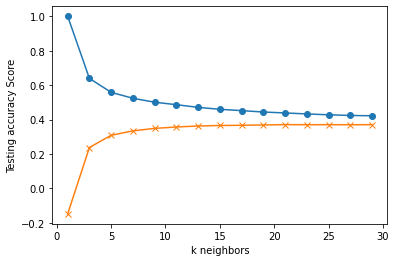

In [32]:
from sklearn.neighbors import KNeighborsRegressor
train_scores = []
test_scores = []
for k in range(1, 30, 2):
    knr = KNeighborsRegressor(n_neighbors=k)
    knr.fit(X_train_scaled, y_train)
    train_score = knr.score(X_train_scaled, y_train)
    test_score = knr.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
plt.plot(range(1, 30, 2), train_scores, marker='o')
plt.plot(range(1, 30, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [21]:
neigh = KNeighborsRegressor(n_neighbors=1)
neigh.fit(X, y)
neigh.score(X, y, sample_weight=None)

1.0

In [23]:
from sklearn.ensemble import RandomForestRegressor
 # Create a random forest regressor
rf = RandomForestRegressor(n_estimators=500)
rf = rf.fit(X_train_scaled, y_train)
rf.score(X_train_scaled, y_train)

0.9538600809448183

In [24]:
feature_names=X.columns
feature_names

Index(['yearpublished', 'minplayers', 'maxplayers', 'minplaytime',
       'maxplaytime', 'minage', 'totalvotes', 'languagedependence',
       'usersrated', 'stddev', 'avgweight', 'numweights', 'numgeeklists',
       'numtrading', 'numwanting', 'numcomments', 'siteviews', 'numplays',
       'numplays_month', 'news', 'blogs', 'weblink', 'podcast',
       'boardgamedesigner_cnt', 'boardgameartist_cnt',
       'boardgamepublisher_cnt', 'boardgamehonor_cnt', 'boardgamecategory_cnt',
       'boardgamemechanic_cnt', 'boardgameexpansion_cnt',
       'boardgameversion_cnt', 'boardgamefamily_cnt'],
      dtype='object')

In [25]:
importances = rf.feature_importances_
rf_feature_importance=sorted(zip(importances, feature_names), reverse=True)
rf_feature_importance

[(0.30115791086489513, 'numwanting'),
 (0.14912184079778185, 'avgweight'),
 (0.1298956054652705, 'yearpublished'),
 (0.06276039822944507, 'stddev'),
 (0.04913975792672199, 'numtrading'),
 (0.035838590145702544, 'numplays'),
 (0.028207628507718213, 'numgeeklists'),
 (0.02548687371176513, 'siteviews'),
 (0.022161896436347077, 'usersrated'),
 (0.015241561625008556, 'numcomments'),
 (0.015217406854502836, 'maxplaytime'),
 (0.014705837417546337, 'maxplayers'),
 (0.013123743960818505, 'boardgamefamily_cnt'),
 (0.012155217828256832, 'totalvotes'),
 (0.012017696625468957, 'minage'),
 (0.011678975932280325, 'numweights'),
 (0.010358148640563222, 'weblink'),
 (0.00978105603506667, 'boardgamemechanic_cnt'),
 (0.009160893293276438, 'boardgameversion_cnt'),
 (0.009120167147549148, 'minplaytime'),
 (0.008879497185589938, 'boardgameexpansion_cnt'),
 (0.008726061952201823, 'blogs'),
 (0.008324746610518805, 'languagedependence'),
 (0.008315669539288426, 'boardgamecategory_cnt'),
 (0.0060786347660871974

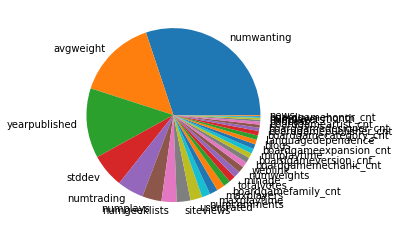

In [26]:
import matplotlib.pyplot as plt
plt.pie([a[0] for a in rf_feature_importance],labels=[a[1] for a in rf_feature_importance])
plt.show()

In [27]:
print(f"Testing Data Score: {rf.score(X_test_scaled, y_test):.5f}")

Testing Data Score: 0.66327


In [28]:
from sklearn import tree
dtr = tree.DecisionTreeRegressor()
dtr = dtr.fit(X_train_scaled, y_train)
dtr.score(X_train_scaled, y_train)

1.0

In [29]:
importances = dtr.feature_importances_
dtr_feature_importance=sorted(zip(importances, feature_names), reverse=True)
dtr_feature_importance

[(0.2987554364216711, 'numwanting'),
 (0.14763879982105851, 'avgweight'),
 (0.1337685647147495, 'yearpublished'),
 (0.06129352227142773, 'stddev'),
 (0.04895082981709499, 'numtrading'),
 (0.03253571851856755, 'numplays'),
 (0.030774992039604387, 'numgeeklists'),
 (0.02563735960318201, 'usersrated'),
 (0.025498957164222992, 'siteviews'),
 (0.02251870478373473, 'maxplayers'),
 (0.021835938474436514, 'numcomments'),
 (0.014254885246023129, 'totalvotes'),
 (0.013602963735784086, 'minage'),
 (0.013562402828324603, 'maxplaytime'),
 (0.010810932652672032, 'boardgameexpansion_cnt'),
 (0.010378878334231092, 'boardgamefamily_cnt'),
 (0.009520452395516434, 'numweights'),
 (0.008817865768509958, 'boardgamemechanic_cnt'),
 (0.008746897590032453, 'boardgameversion_cnt'),
 (0.008019056239230707, 'boardgamecategory_cnt'),
 (0.007428806917278092, 'languagedependence'),
 (0.007184598188111752, 'minplaytime'),
 (0.007031097312590636, 'blogs'),
 (0.005813253741764684, 'weblink'),
 (0.005109962720910208, '

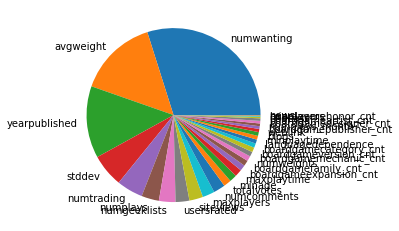

In [30]:
import matplotlib.pyplot as plt
plt.pie([a[0] for a in dtr_feature_importance],labels=[a[1] for a in dtr_feature_importance])
plt.show()